# SI 618 - Homework #3: Data Visualization

Version 2023.09.21.1.CT

For this homework assignment, you will the small MovieLens dataset, available via https://files.grouplens.org/datasets/movielens/ml-latest-small.zip. Download that file to get the data, and also take some time to go through the [README](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) file.

Be sure to download your own copy of the dataset -- do not rely on data that you may have downloaded for a previous assignment.

A major challenge for you in this assignment is to devise a plan to tackle each question.  The question states the overall goal, and in some cases hints are provided, but you will need to think carefully about what data you need to answer each of the questions.  You may need to do some preprocessing of the data to get it into a form that you can use for visualization.


Each of the questions is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

**NOTE**: You are only permitted to use the pandas, Seaborn, and matplotlib libraries for creating visualizations in this assignment. You may use other libraries for other purposes, but you may not use them to create visualizations.

<hr>

First, let's do our usual imports (you might need to import additional modules depending on how you choose to tackle each question):

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

And let's read the data (note: you might need to include path information if the data files are not in the same directory as this notebook):

In [2]:
movies = pd.read_csv('ml-latest-small/movies.csv', index_col=0)
ratings = pd.read_csv('ml-latest-small/ratings.csv', index_col=0)
tags = pd.read_csv('ml-latest-small/tags.csv', index_col=0)

In [ ]:
movies

: 

### Q1: 
Using the `movies` DataFrame, create a visualization that shows the number of movies for each decade from the 1900s to the 2010s.  Use the number in parentheses (e.g. (1975)) at the end of the title as the year.  Drop all rows that do not have a valid year. Be sure to include a title and axis labels.

In [64]:
# insert your code here
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies.dropna(subset=['year'], inplace=True)
movies['year'] = movies['year'].astype(int)
movies.head()

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


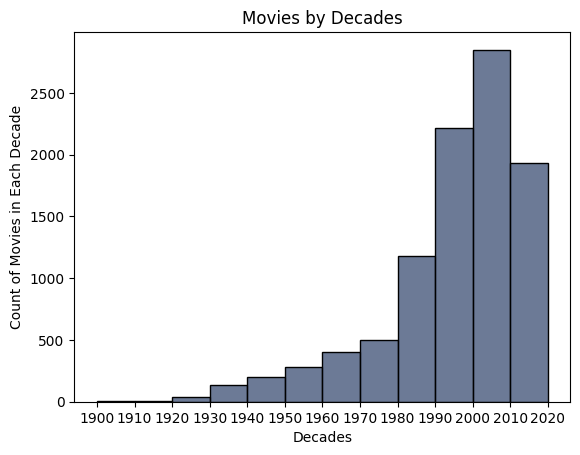

In [65]:
movies_t = movies[(movies['year'] >= 1900) & (movies['year'] <= 2020)]
sns.set_palette("ch:r=-.2,d=.3_r")
ax = sns.histplot(movies_t, x='year', bins=range(1900, 2021, 10))
ax.set_title('Movies by Decades')
ax.set_xlabel('Decades')
ax.set_ylabel('Count of Movies in Each Decade')
ax.set_xticks(range(1900, 2021, 10))

As shown in the figure, there are several interpretations:
- The number of movies in each decade grows over time, from 1900s to 2010s
- A steep ascent occurs during 1980-1990
- Since 1980, the annual growth (amount) has been significant
- Future research may focus on the growth rate instead of absolute amount
- The number of movies surprisingly decrease in 2010s compared to the last decade

### Q2: 
Create a visualization that shows the number of movies in each genre.

**Hint**: the `pd.DataFrame.explode()` function might be useful here.

Be sure that your axis labels are legible!

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Thriller'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Romance'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Horror'),
  Text(8, 0, 'Sci-Fi'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, 'Children'),
  Text(11, 0, 'Animation'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Documentary'),
  Text(14, 0, 'War'),
  Text(15, 0, 'Musical'),
  Text(16, 0, 'Western'),
  Text(17, 0, 'IMAX'),
  Text(18, 0, 'Film-Noir')])

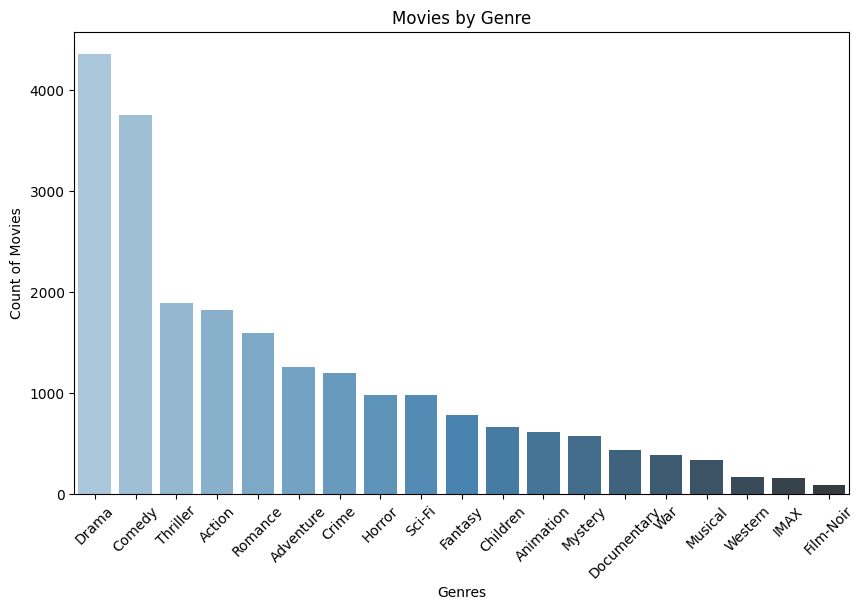

In [66]:
f, ax = plt.subplots(figsize=(10, 6))
movies['genres_list'] = movies['genres'].str.split('|')
movies_explode = movies.explode('genres_list')
movies_explode = movies_explode\
    [movies_explode['genres_list'] != '(no genres listed)']
plot_data = movies_explode.groupby('genres_list').size().\
    sort_values(ascending=False)
ax = sns.barplot(x=plot_data.index, y=plot_data.values, palette='Blues_d')
plt.xticks(rotation=90)
ax.set_xlabel('Genres')
ax.set_ylabel('Count of Movies')
ax.set_title('Movies by Genre')
plt.xticks(rotation=45)

As shown in the figure, there are several interpretations:
- "Drama" and "Comedy" are far ahead other genres and are above 3,000 movies, drama enven above4,000
- Start from "Thriller" (3rd most movies), movie numbers are below 2,000 and gradually decrease
- Very few movies in the dataset have no genres listed

### Q3a: 
Create a visualization showing the distribution of the values from the `rating` column of the `ratings` DataFrame.  


In [67]:
ratings

,movieId,rating,timestamp
userId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931
...,...,...,...
610,166534,4.0,1493848402
610,168248,5.0,1493850091
610,168250,5.0,1494273047


[Text(0, 0, '0.5'),
 Text(1, 0, '1.0'),
 Text(2, 0, '1.5'),
 Text(3, 0, '2.0'),
 Text(4, 0, '2.5'),
 Text(5, 0, '3.0'),
 Text(6, 0, '3.5'),
 Text(7, 0, '4.0'),
 Text(8, 0, '4.5'),
 Text(9, 0, '5.0')]

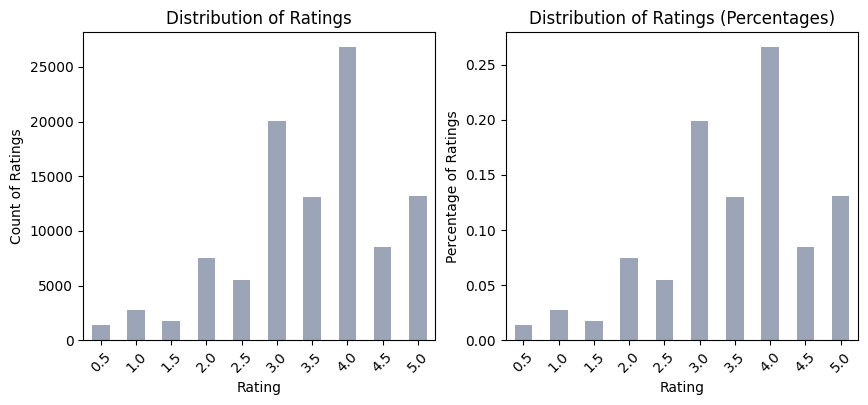

In [68]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.set_palette("ch:r=-.2,d=.3_r")
ratings['rating'].value_counts().sort_index().plot(kind='bar', ax=ax1, alpha=0.5)
ax1.set_title('Distribution of Ratings')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count of Ratings')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ratings['rating'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=ax2, alpha=0.5)
ax2.set_title('Distribution of Ratings (Percentages)')
ax2.set_xlabel('Rating')   
ax2.set_ylabel('Percentage of Ratings')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

As shown in the figure, there are several interpretations:
- Not a normal distribution and is left skewed
- Score "4" takes up the most percentage (>25%) while score "0.5" takes up the leat percentage (<5%)
- More than 75% of the users rate "3.0" or higher

### Q3b:
What do you notice about the relative number of whole-number ratings (1,2,3,4,and 5) compared to the half-ratings (0.5, 1.5, 2.5, 3.5, 4.5)?  Investigate the data further to see if you can figure out why that's the case.  (Hint: a scatterplot showing the ratings vs. time might be helpful.)

In [69]:
whole_number_ratings = ratings[ratings['rating']%1==0]
half_number_ratings = ratings[ratings['rating']%1!=0]
print("whole-number ratings number:", whole_number_ratings.shape[0])
print("half-nmber ratings number:", half_number_ratings.shape[0])

whole-number ratings number: 70438
half-nmber ratings number: 30398


Text(0, 0.5, 'Rating')

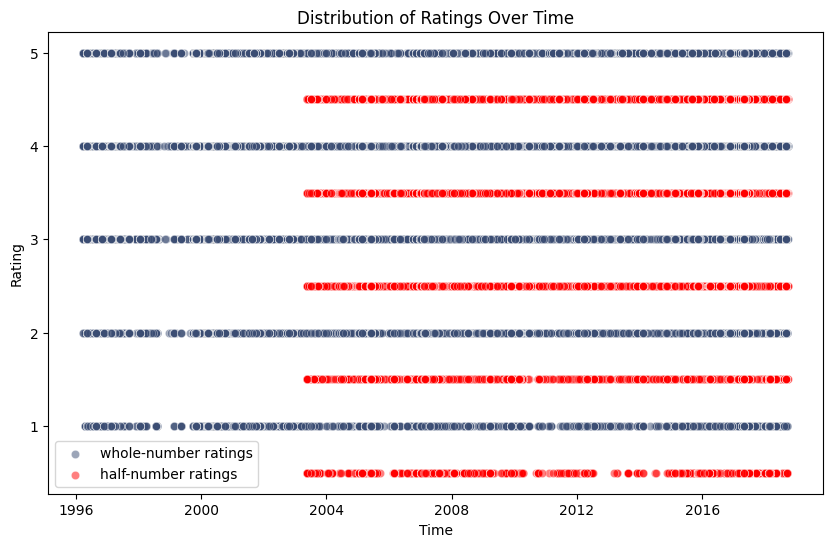

In [70]:
figure, ax = plt.subplots(figsize=(10, 6))
whole_number_ratings.loc[:, 'timestamp'] = pd.to_datetime(whole_number_ratings['timestamp'], unit='s')
half_number_ratings.loc[:, 'timestamp'] = pd.to_datetime(half_number_ratings['timestamp'], unit='s')
sns.set_palette("ch:r=-.2,d=.3_r")
sns.scatterplot(data=whole_number_ratings, x='timestamp', y='rating', alpha=0.5, ax=ax)
sns.scatterplot(data=half_number_ratings, x='timestamp', y='rating', color='red', alpha=0.5, ax=ax)
plt.legend(labels=['whole-number ratings', 'half-number ratings'])
plt.title('Distribution of Ratings Over Time')
plt.xlabel('Time')
plt.ylabel('Rating')

As shown in the figure, there are several interpretations:
- **Phenomenon:** The number of whole-scores is twice that of half-scores
- **Possible Reason:** The whole-scores start from around 1996 while the half-socres start around 2004. So there are differences in data accumulation.

### Q4:
Write code to confirm the assertion that the ratings ["were created by 610 users between March 29, 1996 and September 24, 2018."](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

In [71]:
ratings['time'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings[(ratings['time'] >= '1996-03-29') & (ratings['time'] <= '2018-09-24')]
print("The number of unique users between 1996-03-29 and 2018-09-24: ", \
    ratings.index.nunique())

The number of unique users between 1996-03-29 and 2018-09-24:  610


### Q5:
Create a visualization showing the number of ratings produced on each day of the week.  

Hint: the `pd.to_datetime()` function might be useful here, as well as the `dt` accessor.

Make sure your axis labels are in a reasonable order.

In [72]:
ratings['day_name'] = ratings['time'].dt.day_name()
ratings['day_name']

userId
1         Sunday
1         Sunday
1         Sunday
1         Sunday
1         Sunday
         ...    
610    Wednesday
610    Wednesday
610       Monday
610    Wednesday
610    Wednesday
Name: day_name, Length: 100836, dtype: object

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

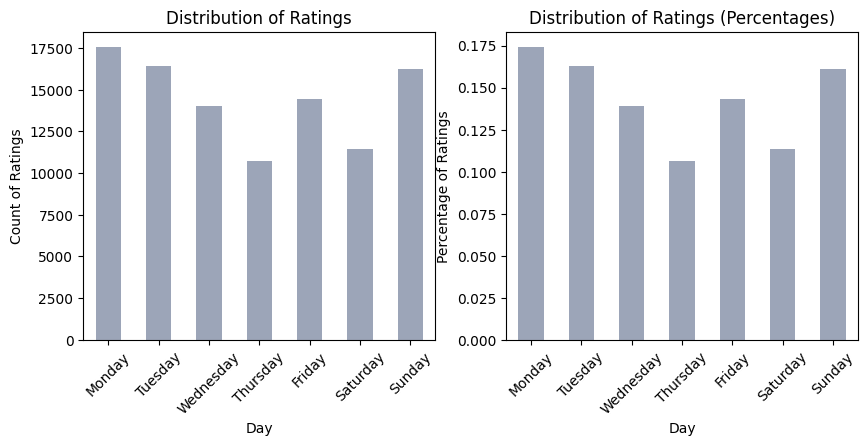

In [73]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.set_palette("ch:r=-.2,d=.3_r")

my_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ratings['day_name'].value_counts().reindex(my_order).plot(kind='bar', ax=ax1, alpha=0.5)
ax1.set_title('Distribution of Ratings')
ax1.set_xlabel('Day')
ax1.set_ylabel('Count of Ratings')

ratings['day_name'].value_counts(normalize=True).reindex(my_order).plot(kind='bar', ax=ax2, alpha=0.5)
ax2.set_title('Distribution of Ratings (Percentages)')
ax2.set_xlabel('Day')   
ax2.set_ylabel('Percentage of Ratings')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)



As shown in the figure, there are several interpretations:
- Rank the day name starting from Monday and Ending with Sunday because from this order can see how the rating number goes with time. Also, it is more convenient to compare the neighboring days.
- Rating number is the lowest on Thursday and the highest on Monday
- Users tend to rate less over Monday to Thursday

### Q6a:

Create a new column called `taglength` in the `tags` DataFrame that contains the number of **characters** in the tag.

**Hint:** the `str.len()` function might be useful here.

In [74]:
tags.head()

,movieId,tag,timestamp
userId,,,
2,60756,funny,1445714994
2,60756,Highly quotable,1445714996
2,60756,will ferrell,1445714992
2,89774,Boxing story,1445715207
2,89774,MMA,1445715200


In [75]:
tags['taglength'] = tags['tag'].str.replace(' ', '').str.len()
tags.head()

,movieId,tag,timestamp,taglength
userId,,,,
2,60756,funny,1445714994,5
2,60756,Highly quotable,1445714996,14
2,60756,will ferrell,1445714992,11
2,89774,Boxing story,1445715207,11
2,89774,MMA,1445715200,3


### Q6b: 
Create a histogram of your newly created `taglength` column.  Experiment with different numbers of bins (or binwidths) until you're happy with the representation.

<Axes: xlabel='taglength', ylabel='Count'>

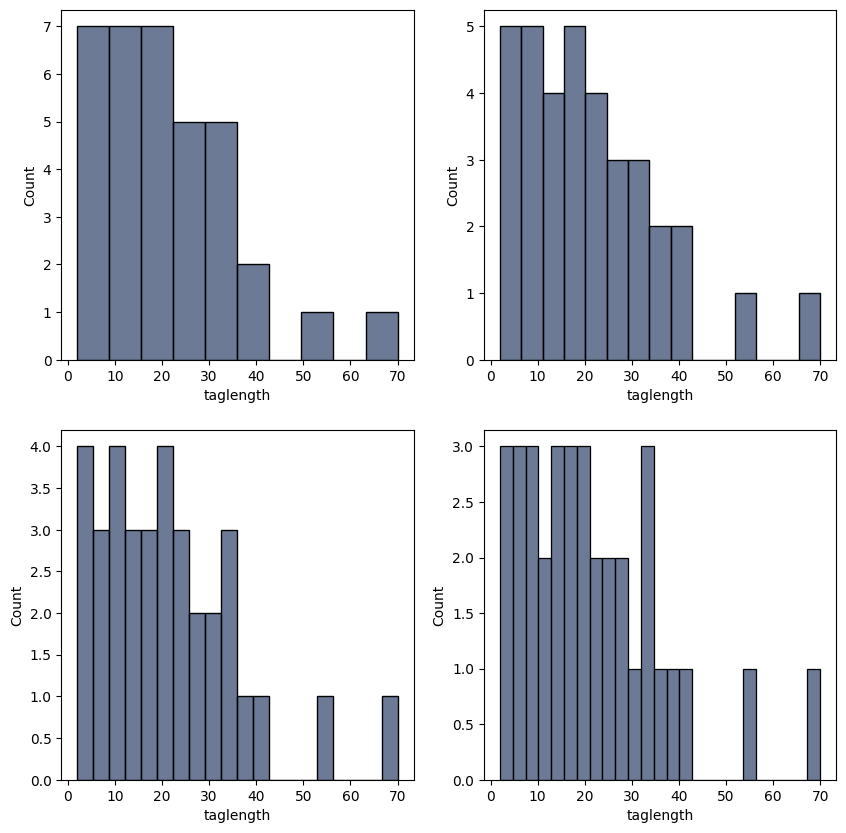

In [76]:
sns.set_palette("ch:r=-.2,d=.3_r")

plot_data = tags['taglength'].value_counts().sort_index()

f, ax = plt.subplots(2,2, figsize=(10, 10)) 
sns.histplot(plot_data, x='taglength', bins=10, ax=ax[0, 0])
sns.histplot(plot_data, x='taglength', bins=15, ax=ax[0, 1])
sns.histplot(plot_data, x='taglength', bins=20, ax=ax[1, 0])
sns.histplot(plot_data, x='taglength', bins=25, ax=ax[1, 1])

The figure with bin=20 performs best since it can both clearly represent changes and save space.

<Axes: xlabel='taglength', ylabel='Count'>

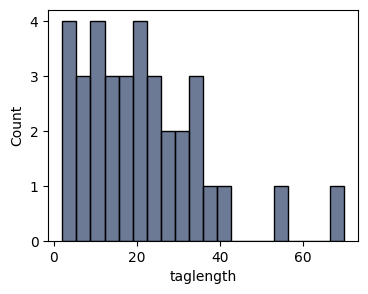

In [77]:
f, ax = plt.subplots(figsize=(4, 3))
sns.histplot(plot_data, x='taglength', bins=20)

### Q7:
Create a visualization that shows the average rating for each genre.


In [78]:
ratings_movies = pd.merge(ratings.reset_index(), movies, on='movieId', \
    how='left')
ratings_movies['genres_list'] = ratings_movies['genres'].str.split('|')
ratings_movies_exploded = ratings_movies.explode('genres_list')
ratings_movies_exploded.head()

,userId,movieId,rating,timestamp,time,day_name,title,genres,year,genres_list
0,1,1,4.0,964982703,2000-07-30 18:45:03,Sunday,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,Adventure
0,1,1,4.0,964982703,2000-07-30 18:45:03,Sunday,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,Animation
0,1,1,4.0,964982703,2000-07-30 18:45:03,Sunday,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,Children
0,1,1,4.0,964982703,2000-07-30 18:45:03,Sunday,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,Comedy
0,1,1,4.0,964982703,2000-07-30 18:45:03,Sunday,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,Fantasy


In [79]:
ratings_movies_exploded = ratings_movies_exploded\
    [ratings_movies_exploded['genres_list'] != '(no genres listed)']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Film-Noir'),
  Text(1, 0, 'War'),
  Text(2, 0, 'Documentary'),
  Text(3, 0, 'Crime'),
  Text(4, 0, 'Drama'),
  Text(5, 0, 'Mystery'),
  Text(6, 0, 'Animation'),
  Text(7, 0, 'IMAX'),
  Text(8, 0, 'Western'),
  Text(9, 0, 'Musical'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Romance'),
  Text(12, 0, 'Thriller'),
  Text(13, 0, 'Fantasy'),
  Text(14, 0, 'Sci-Fi'),
  Text(15, 0, 'Action'),
  Text(16, 0, 'Children'),
  Text(17, 0, 'Comedy'),
  Text(18, 0, 'Horror')])

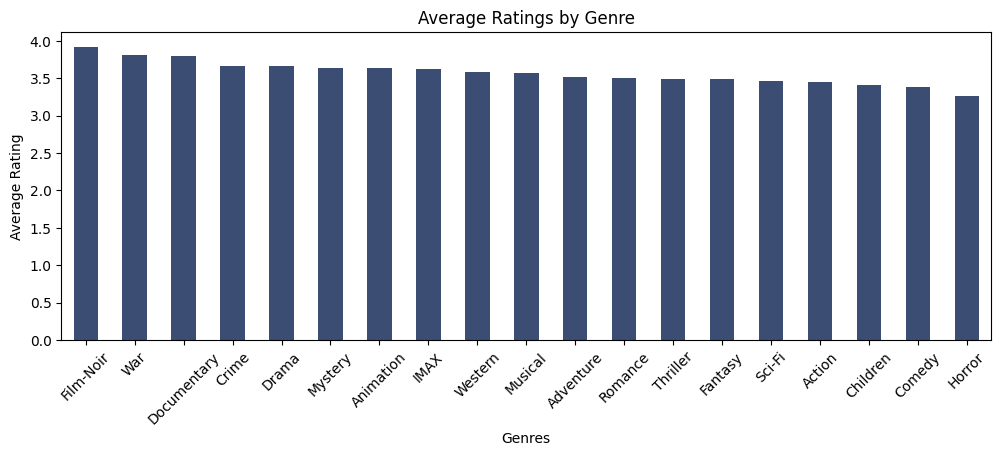

In [80]:
ratings_movies_exploded.groupby('genres_list')['rating'].mean().\
    sort_values(ascending=False).\
    plot(kind='bar', figsize=(12, 4), legend=False)
plt.title('Average Ratings by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

As shown in the figure, there are several interpretations:
- The three Genres with highest rating are Film-Noir, War and Documentary
- The three Genres with lowest rating are Children, Comedy and Horror 

### Q8:
Create a visualization that shows the distribution of the **number** of ratings of "good" movies (i.e., those with a mean rating of 3.5 or highter) and "bad" movies (i.e., those with a mean rating of less than 3.5), broken down by the decade when the movie was released.

**Hint:** You will need to join the `movies` and `ratings` DataFrames to get the decade information.

**Hint:** You may want to create a box plot or a violin plot (or both).

In [81]:
ratings_movies.dropna(subset=['year'], inplace=True)
ratings_movies.loc[ratings_movies['rating'] >= 3.5, 'class'] = 'good'
ratings_movies.loc[ratings_movies['rating'] < 3.5, 'class'] = 'bad'

ratings_movies.sample(5)

,userId,movieId,rating,timestamp,time,day_name,title,genres,year,genres_list,class
7436,51,236,5.0,1230929830,2009-01-02 20:57:10,Friday,French Kiss (1995),Action|Comedy|Romance,1995.0,"[Action, Comedy, Romance]",good
34256,232,7173,3.5,1182908786,2007-06-27 01:46:26,Wednesday,Along Came Polly (2004),Comedy|Romance,2004.0,"[Comedy, Romance]",good
23639,160,4643,0.5,1065992210,2003-10-12 20:56:50,Sunday,Planet of the Apes (2001),Action|Adventure|Drama|Sci-Fi,2001.0,"[Action, Adventure, Drama, Sci-Fi]",bad
32924,224,858,4.0,971812264,2000-10-17 19:51:04,Tuesday,"Godfather, The (1972)",Crime|Drama,1972.0,"[Crime, Drama]",good
25057,177,1235,3.0,1435534931,2015-06-28 23:42:11,Sunday,Harold and Maude (1971),Comedy|Drama|Romance,1971.0,"[Comedy, Drama, Romance]",bad


In [82]:
ratings_movies.loc[:,'decade'] = \
    pd.cut(ratings_movies['year'], bins=range(1900, 2021, 10), right=False)

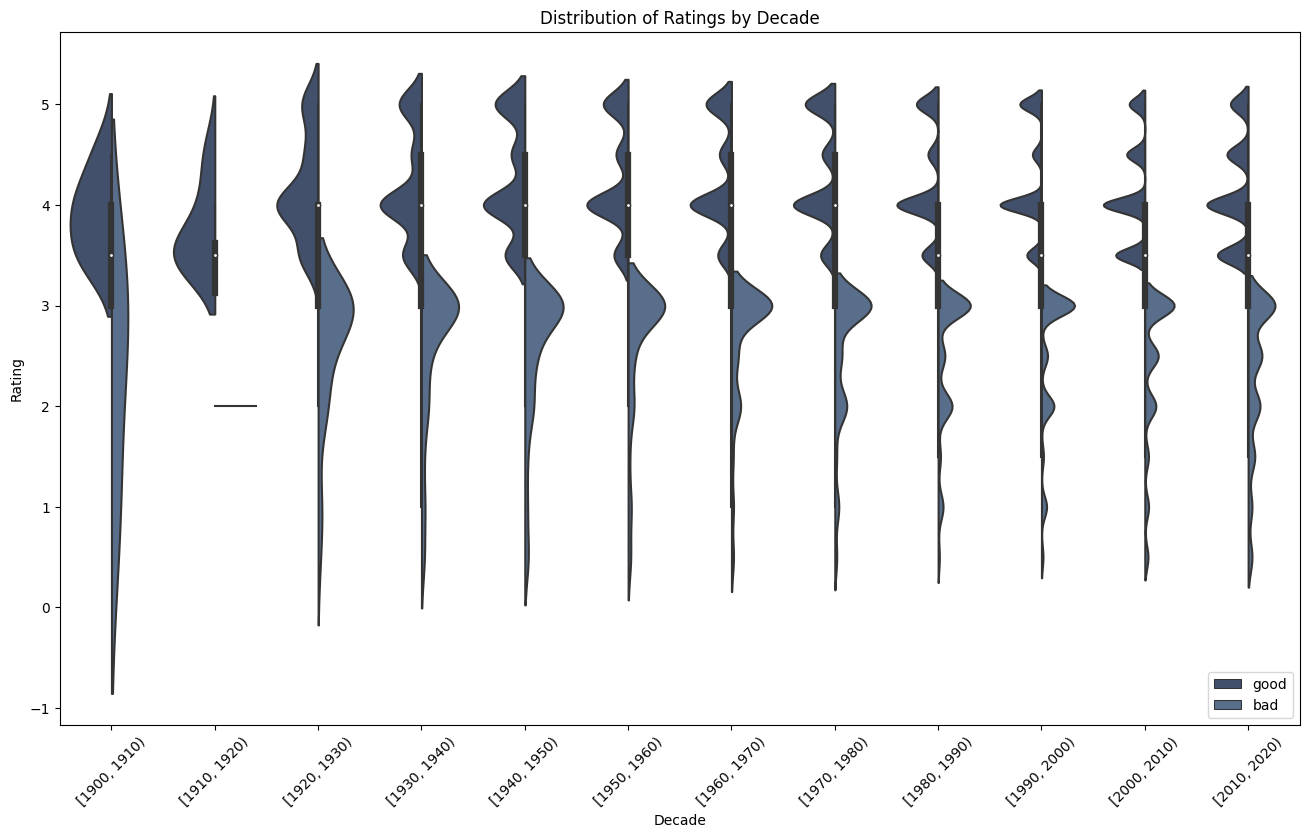

In [83]:
sns.set_palette("ch:r=-.2,d=.3_r")
f, ax = plt.subplots(figsize=(16, 9))
# sns.violinplot(data=good_data, x='rating', inner="box", ax=ax[0])
# sns.violinplot(data=bad_data, x='rating', inner="box", ax=ax[1], palette='Blues_d')
sns.violinplot(data=ratings_movies, \
    x='decade', y='rating', hue='class', inner="box", \
        split=True, legend=False)
ax.set_title('Distribution of Ratings by Decade')
ax.set_xlabel('Decade')
ax.set_ylabel('Rating')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.legend(loc="lower right")

<function matplotlib.pyplot.show(close=None, block=None)>

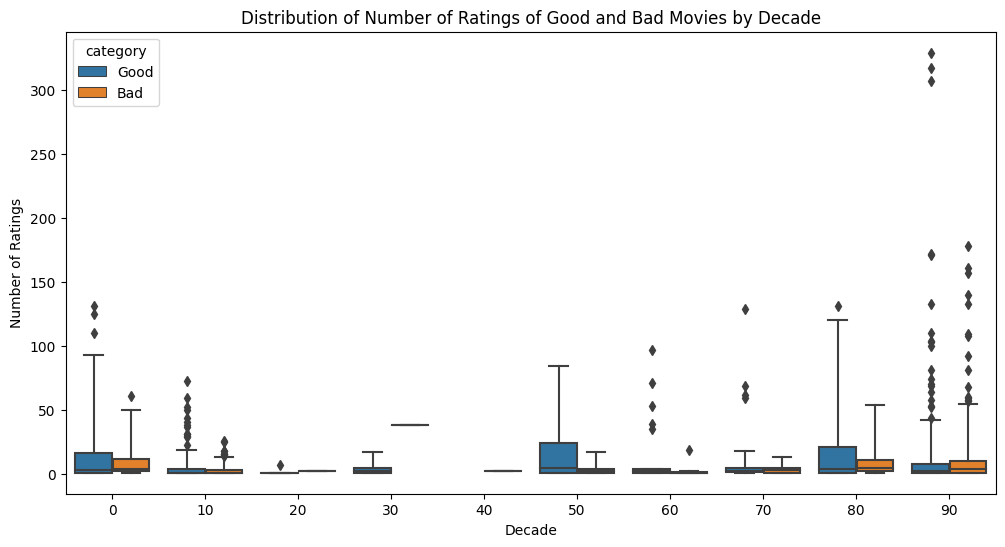

In [6]:
# The question particularly asks to visualize the number of ratings rather than average ratings per decade.

# Extract year from the title
movies['year'] = movies['title'].str.extract(r'(\d4)')
movies = movies.dropna(subset=['year'])
movies['year'] = movies['year'].astype(int)

# Calculate the decade
movies['decade'] = (movies['year'] // 10) * 10
# movies
mean_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')
count_ratings = ratings.groupby('movieId')['rating'].count().reset_index(name='num_ratings')


# Merge the calculated DataFrames
rating_stats = pd.merge(mean_ratings, count_ratings, on='movieId')

# rating_stats
movie_ratings = pd.merge(movies, rating_stats, on='movieId')

# Categorize movies as "good" or "bad" based on mean rating
movie_ratings['category'] = movie_ratings['mean_rating'].apply(lambda x: 'Good' if x >= 3.5 else 'Bad')


# Create a box plot or violin plot
plt.figure(figsize=(12,6))
sns.boxplot(x='decade', y='num_ratings', hue='category', data=movie_ratings, whis=5)
plt.title('Distribution of Number of Ratings of Good and Bad Movies by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Ratings')
plt.show

As shown in the figure, there are several interpretations:

For both "good" and "bad" movies:
- In most of the decades, the nunmber of ratings are around 2500
- In a few decades, there are very high number of ratings
- There tend to be more "lower ratings" as decade goes

For "good" movies:
- It has more possibility to have very high number of outlier ratings in some decades

For "bad" movies:
- It has less possibility to have very high number of outlier ratings in some decades, i.e., data are more contentrated

## END OF NOTEBOOK